In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

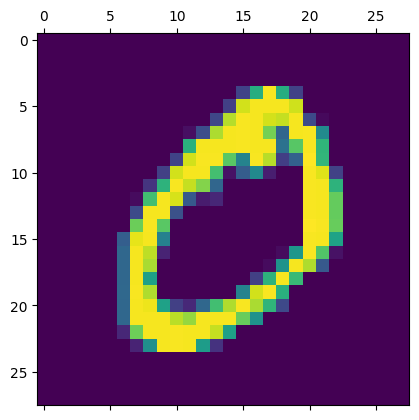

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[1]

0

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

<b> Scaling

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [15]:
X_test_flattened.shape

(10000, 784)

<img src="digits_nn.jpg">

<h1>Neural Network</h1>

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8174 - loss: 0.7105
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9140 - loss: 0.3120
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9241 - loss: 0.2702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9284 - loss: 0.2586
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9301 - loss: 0.2482
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9293 - loss: 0.2508
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9303 - loss: 0.2549
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9290 - loss: 0.2546
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9297 - loss: 0.2486


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9145 - loss: 0.3042


[0.2670980393886566, 0.9266999959945679]

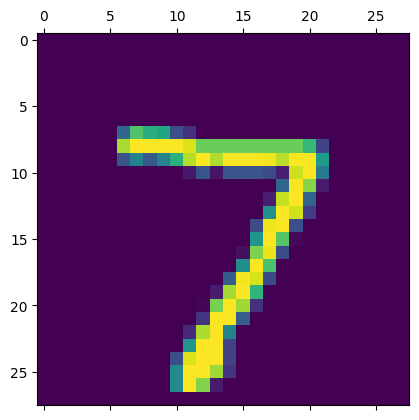

In [18]:
plt.matshow(X_test[0])

In [19]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
y_pred[0]

array([4.9605668e-03, 1.7004437e-08, 1.8921223e-02, 9.6631718e-01,
       2.2518281e-03, 1.5107828e-01, 4.6727504e-08, 9.9975759e-01,
       9.4618939e-02, 7.2806132e-01], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

<b>Confushion Matrix

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    8,  928,   16,    7,    3,   13,    8,   38,    5],
       [   3,    0,   20,  927,    0,   17,    2,    8,   23,   10],
       [   1,    1,    4,    2,  909,    0,   11,    3,    6,   45],
       [   9,    3,    3,   35,   11,  766,   17,    8,   33,    7],
       [  12,    3,    8,    1,    7,    8,  916,    1,    2,    0],
       [   1,    6,   27,    5,   10,    1,    0,  927,    2,   49],
       [   6,   12,    6,   17,    9,   18,   10,    7,  875,   14],
       [  11,    7,    1,    7,   25,    5,    0,    8,    7,  938]])>

Text(95.72222222222221, 0.5, 'Truth')

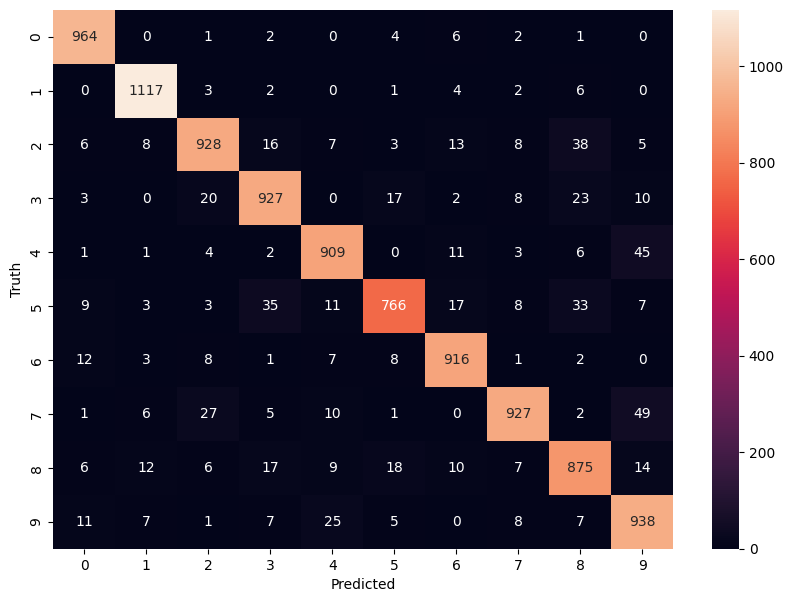

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1>Adding A Hidden Layers</h1>

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8735 - loss: 0.4574
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1337
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9749 - loss: 0.0845
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0624
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0469
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0378
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0217
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9947 - loss: 0.0176


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0945


[0.08246003836393356, 0.9757999777793884]

In [28]:
y_pred = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[7, 2, 1, 0, 4]

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    0,    3,    2,    3,    0],
       [   0, 1116,    4,    1,    0,    0,    2,    1,   11,    0],
       [   5,    0, 1005,    6,    1,    0,    0,    6,    9,    0],
       [   0,    0,    4,  992,    0,    1,    0,    7,    4,    2],
       [   1,    1,    5,    0,  960,    0,    3,    2,    4,    6],
       [   2,    1,    0,   20,    1,  846,    6,    1,   14,    1],
       [   2,    2,    1,    1,    8,    3,  939,    0,    2,    0],
       [   1,    0,    5,    4,    1,    0,    0, 1010,    3,    4],
       [   2,    0,    2,    4,    3,    1,    2,    4,  954,    2],
       [   1,    2,    0,    8,   13,    5,    0,    8,    7,  965]])>

Text(95.72222222222221, 0.5, 'Truth')

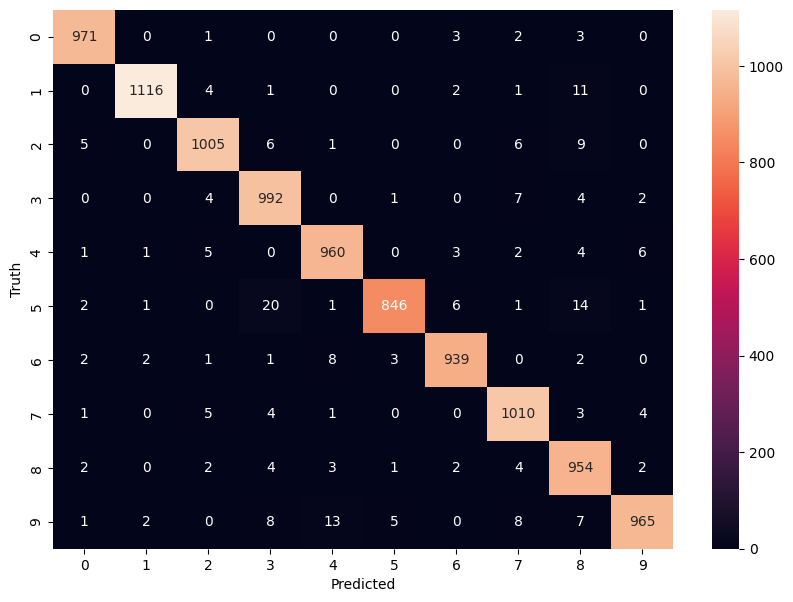

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<b>Use keras Flatten

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8728 - loss: 0.4562
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1368
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9737 - loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0518
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0388
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0269
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0177
